# Brazilian bond and Nelson-Siegel-Svensson classes
## Author: Gustavo Soares

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from finmath.brazilian_bonds.government_bonds import LTN, NTNF
from finmath.termstructure.curve_models import NelsonSiegelSvensson as NSS

### LTNs (zero coupon bonds)

In [2]:
ref_date = pd.to_datetime('2021-02-05').date()

ltn_expires = [
    '2021-04-01',
    '2021-07-01',
    '2021-10-01',
    '2022-01-01',
    '2022-04-01',
    '2022-07-01',
    '2022-10-01',
    '2023-01-01',
    '2023-07-01',
    '2024-01-01',
    '2024-07-01',
]

ltn_yields = [
    0.020580,
    0.023885,
    0.029904,
    0.034463,
    0.040148,
    0.044847,
    0.049137,
    0.052500,
    0.057519,
    0.061150,
    0.064247,
]

ltn_prices = []
ltn_cash_flows = []
for T, y in zip(ltn_expires, ltn_yields):
        ltn = LTN(expiry=T, rate=y, ref_date=ref_date)
        ltn_prices += [ltn.price]
        ltn_cash_flows += [ltn.cash_flows.iloc[1:]]

### NTNFs (coupon paying bonds)

In [3]:
ntnf_expires = [
    '2023-01-01',
    '2025-01-01',
    '2027-01-01',
    '2029-01-01',
    '2031-01-01',
]

ntnf_yields = [
    0.05113,
    0.06215,
    0.06869,
    0.07317,
    0.07639,
]

ntnf_prices = []
ntnf_cash_flows = []
for T, y in zip(ntnf_expires, ntnf_yields):
        ntnf = NTNF(expiry=T, rate=y, ref_date=ref_date)
        ntnf_prices += [ntnf.price]
        ntnf_cash_flows += [ntnf.cash_flows.iloc[1:]]

### Nelson-Siegel-Svensson model estimation

In [4]:
all_bond_prices = ltn_prices + ntnf_prices
all_bond_cash_flows = ltn_cash_flows + ntnf_cash_flows

nss = NSS(prices=all_bond_prices, cash_flows=all_bond_cash_flows, ref_date=ref_date)
nss.betas

array([ 0.10415089, -0.08406111, -0.0754821 , -0.09471429])

#### Plot curves

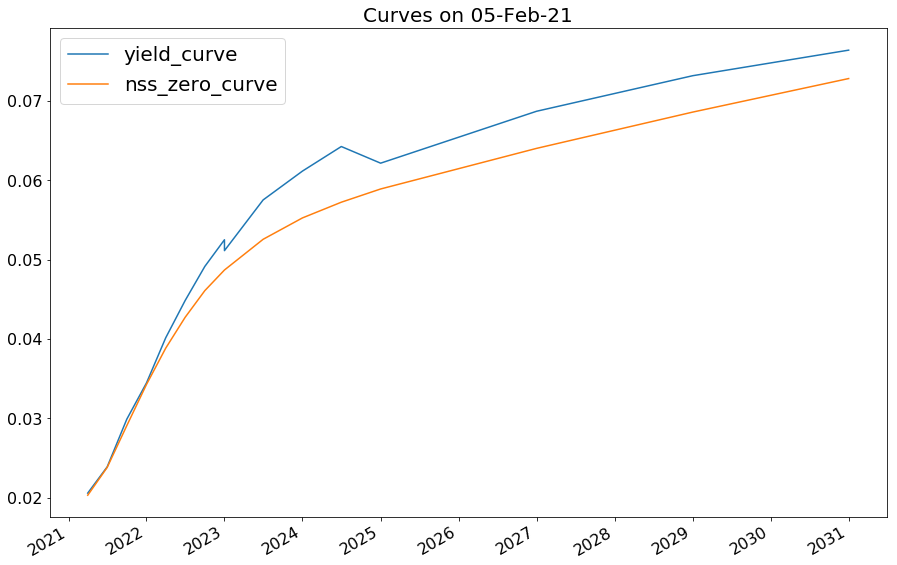

In [5]:
curves = pd.DataFrame(index=pd.to_datetime(ltn_expires + ntnf_expires),
                           columns=['yield_curve'],
                           data=ltn_yields + ntnf_yields).sort_index()
curves['nss_zero_curve'] = [nss.rate_for_ytm(betas=nss.betas, ytm=nss.dc.tf(nss.ref_date, x)) for x in curves.index]
curves.plot(figsize=(15,10), fontsize=16)
plt.title('Curves on %s' % nss.ref_date.strftime('%d-%b-%y'), fontsize=20)
plt.legend(fontsize=20)
plt.show()